In [1]:
import pandas as pd
import os
import json

class Const:
    OCR = 'ocr'
    GROUND = 'groundtruth'
    REGION = 'region'
    LINE = 'line'
    SENTENCE = 'sentence'
    FILE = 'filename'
    DATASET = 'dataset_name'
    PREDICTION = 'prediction'
    PROMPT = 'prompt'
    LANGUAGE = 'language'
    NONE = None


In [2]:
datasets = []

for root, dirs, files in os.walk('../data/datasets/ocr/converted'):
    for file in files:
        if file.endswith(".jsonl"):
            input_file = os.path.join(root, file)
            print(input_file)
            with open(input_file) as f:
                lines = f.read().splitlines()
            df_inter = pd.DataFrame(lines)
            df_inter.columns = ['json_element']
            df_inter['json_element'].apply(json.loads)
            df = pd.json_normalize(df_inter['json_element'].apply(json.loads))
            datasets.append(df)

../data/datasets/ocr/converted/ajmc_mixed.jsonl
../data/datasets/ocr/converted/ajmc_primary_text.jsonl
../data/datasets/ocr/converted/icdar-2017.jsonl
../data/datasets/ocr/converted/overproof.jsonl
../data/datasets/ocr/converted/icdar-2019.jsonl
../data/datasets/ocr/converted/impresso-nzz.jsonl
../data/datasets/ocr/converted/sample/sample.jsonl


In [3]:
print('Number of unique lines/sentences/regions.\n')
for dataset in datasets:
    print('Dataset:', dataset['dataset_name'].unique()[0])
    print('No. lines:', dataset['ocr.line']. nunique(), '/', len(dataset['ocr.sentence']), 
          'No. sentences:', dataset['ocr.sentence']. nunique(), '/', len(dataset['ocr.sentence']), 
          'No. regions:', dataset['ocr.region']. nunique(), '/', len(dataset['ocr.region']))
    print('-'*80)

Number of unique lines/sentences/regions.

Dataset: ajmc
No. lines: 870 / 2131 No. sentences: 679 / 2131 No. regions: 63 / 2131
--------------------------------------------------------------------------------
Dataset: ajmc
No. lines: 151 / 330 No. sentences: 112 / 330 No. regions: 33 / 330
--------------------------------------------------------------------------------
Dataset: icdar-2017
No. lines: 0 / 477 No. sentences: 461 / 477 No. regions: 28 / 477
--------------------------------------------------------------------------------
Dataset: overproof
No. lines: 2278 / 2669 No. sentences: 399 / 2669 No. regions: 41 / 2669
--------------------------------------------------------------------------------
Dataset: icdar-2019
No. lines: 0 / 404 No. sentences: 404 / 404 No. regions: 41 / 404
--------------------------------------------------------------------------------
Dataset: impresso-nzz
No. lines: 3709 / 6140 No. sentences: 1943 / 6140 No. regions: 635 / 6140
--------------------------

In [4]:
datasets[0].head()

,filename,dataset_name,ocr.line,ocr.sentence,ocr.region,groundtruth.line,groundtruth.sentence,groundtruth.region
0,bsb10234118,ajmc,ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. III. i...,ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm.,ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. II. in...,ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. II. in...,ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm.,ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. III. i...
1,bsb10234118,ajmc,I. T. XVI. p. 731. et 718. eamque κακόζηλον ἑρ...,p. 731.,ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. II. in...,1. T. XVI. p. 731. et 718. eamque κακόζηλον ἑρ...,p. 731.,ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. III. i...
2,bsb10234118,ajmc,V. 9. Ἔνδον γὰρ ἀνήρ - Olim adnotavi articulum...,V. 9.,ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. II. in...,"V. 9. ""Evdov γὰρ ‘arıjg — Olim adnotavi articu...",V. 9.,ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. III. i...
3,bsb10234118,ajmc,δατος Aristoph. Lys. 370. αἱρώμεθ’ ὑμεῖς θοὔδ...,Lys.,ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. II. in...,durog Aristoph. Lys. 370. αἱρώμεθ’ ὑμεῖς θοὔδα...,Lys.,ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. III. i...
4,bsb10234118,ajmc,xerit Sophocles χθονὸς ἀείρας et Oppian. Cyn. ...,Cyn.,ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. II. in...,xerit Sophocles χθονὸς deigag et Oppian. Cyn. ...,Cyn.,ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. III. i...


In [5]:
GENERATE_SAMPLE = False

In [6]:
dataset = pd.concat(datasets)

In [7]:
len(dataset)

13366

In [8]:
dataset.columns

Index(['filename', 'dataset_name', 'ocr.line', 'ocr.sentence', 'ocr.region',
       'groundtruth.line', 'groundtruth.sentence', 'groundtruth.region',
       'language', 'File', 'Date', 'Type', 'NbAlignedChar', 'article_id'],
      dtype='object')

In [9]:
if GENERATE_SAMPLE:
    from sklearn.model_selection import train_test_split

    files_keep, files_removed, _, _ = train_test_split(dataset, dataset['dataset_name'], 
                                                       test_size=0.90, random_state=42)

In [11]:
if GENERATE_SAMPLE:
    output_file = '../data/datasets/ocr/converted/sample/sample.jsonl'
    with open(output_file, "w") as outfile:
        for index, row in files_keep.iterrows():

            json_line = json.dumps({Const.LANGUAGE: row['language'],
                                    Const.FILE: row['filename'],
                                    Const.DATASET: row['dataset_name'],
                                    Const.OCR: {Const.LINE: row['ocr.line'],
                                                Const.SENTENCE: row['ocr.sentence'],
                                                Const.REGION: row['ocr.region']}, 
                                    Const.GROUND: {Const.LINE: row['groundtruth.line'],
                                                   Const.SENTENCE: row['groundtruth.sentence'],
                                                   Const.REGION: row['groundtruth.region']},
                                    'File': row['File'], 
                                    'Date': row['Date'],
                                    'Type': row['Type'], 
                                    'NbAlignedChar': row['NbAlignedChar'], 
                                    'article_id': row['article_id']
                                    })

            outfile.write(json_line + "\n")
            outfile.flush()

### Analsys of preliminary results

In [12]:
results = []

for root, dirs, files in os.walk('../data/output'):
    for file in files:
        if file.endswith(".jsonl"):
            input_file = os.path.join(root, file)
            print(input_file)
            with open(input_file) as f:
                lines = f.read().splitlines()
            df_inter = pd.DataFrame(lines)
            df_inter.columns = ['json_element']
            df_inter['json_element'].apply(json.loads)
            df = pd.json_normalize(df_inter['json_element'].apply(json.loads))
            df['LM'] = [file[16:-6]] * len(df)
            results.append(df)
            

../data/output/prompt_basic_01/sample/results-sample-facebook-opt-350m.jsonl
../data/output/prompt_basic_01/sample/results-sample-gpt2.jsonl
../data/output/prompt_basic_01/sample/results-sample-bigscience-bloom-560m.jsonl


In [13]:
results[0].columns

Index(['language', 'filename', 'dataset_name', 'File', 'Date', 'Type',
       'NbAlignedChar', 'article_id', 'ocr.line', 'ocr.sentence', 'ocr.region',
       'groundtruth.line', 'groundtruth.sentence', 'groundtruth.region',
       'prediction.prompt', 'prediction.line', 'prediction.sentence',
       'prediction.region', 'LM'],
      dtype='object')

In [14]:
from Levenshtein import distance

def levenshtein(reference, hypothesis, progress_bar=False):
    print(reference, hypothesis)
    
    assert len(reference) == len(hypothesis)
    text = zip(reference, hypothesis)
    if progress_bar:
        text = tqdm(text, total=len(reference))
    d = [distance(r, h) for r, h in text]
    output = pd.DataFrame({"reference": reference, "hypothesis": hypothesis})\
        .assign(distance=lambda df: d)\
        .assign(
        cer=lambda df: df.apply(
            lambda r: 100 * r["distance"] / max(len(r["reference"]), 1),
            axis=1
        )
    )
    return output

In [15]:
levenshtein("ve>nachlässig'c» Slilrichtung wieder gebührende Beach".split(), 
            "ve>nachlässig'c» Slilrichtung wieder gebührende Beach".split(), progress_bar=False)

["ve>nachlässig'c»", 'Slilrichtung', 'wieder', 'gebührende', 'Beach'] ["ve>nachlässig'c»", 'Slilrichtung', 'wieder', 'gebührende', 'Beach']


,reference,hypothesis,distance,cer
0,ve>nachlässig'c»,ve>nachlässig'c»,0,0.0
1,Slilrichtung,Slilrichtung,0,0.0
2,wieder,wieder,0,0.0
3,gebührende,gebührende,0,0.0
4,Beach,Beach,0,0.0


In [17]:
import Levenshtein


def compute_levenshtein_distance(text1, text2):
#     print(text1, text2)
    if ('No text' in text1) or 'No text' in text2:
        return -150
    return Levenshtein.distance(text1, text2)

def compute_normalized_levenshtein_distance(text1, text2):
    distance = Levenshtein.distance(text1, text2)
    max_length = max(len(text1), len(text2))
    normalized_distance = distance / max_length
    return normalized_distance


def evaluate_ocr(original_ocr_text, corrected_ocr_text, ground_truth_text):
    original_distance = compute_levenshtein_distance(original_ocr_text, ground_truth_text)
    corrected_distance = compute_levenshtein_distance(corrected_ocr_text, ground_truth_text)
    return original_distance, corrected_distance


def get_improvement(original_distance, corrected_distance):
    return original_distance - corrected_distance


In [18]:
# Define a function to compute the OCR noise level
def compute_ocr_noise_level(ground_truth, ocr_text):
#     print('ground_truth', ground_truth, len(ground_truth))
    levenshtein_dist = Levenshtein.distance(ground_truth, ocr_text)
    return levenshtein_dist / len(ground_truth)

In [19]:
import numpy as np

def align_text(ground_truth_text, ocr_text):
    # Define a window size for matching substrings
    window_size = 10

    # Find the substring in the OCR text with the smallest Levenshtein distance to the ground truth text
    min_distance = np.inf
    best_start_idx = 0
    for start_idx in range(len(ocr_text) - window_size + 1):
        end_idx = start_idx + window_size
        window_text = ocr_text[start_idx:end_idx]
        window_distance = distance(window_text, ground_truth_text)
        if window_distance < min_distance:
            min_distance = window_distance
            best_start_idx = start_idx

    # Align the OCR and ground truth text based on the best matching substring
    aligned_ocr_text = " " * best_start_idx + ocr_text[best_start_idx:best_start_idx+len(ground_truth_text)]
    
    print(ground_truth_text)
    print(aligned_ocr_text, '\n------')
    return ground_truth_text, aligned_ocr_text


In [23]:
from genalog.text import anchor
from metrics import get_stats

def align_texts(gt_text, ocr_text):

    # We align the texts with RETAS Method
    try:
        aligned_gt, aligned_noise = anchor.align_w_anchor(gt_text, ocr_text)
    except:
        aligned_gt, aligned_noise = gt_text, ocr_text
        
    print(get_stats(gt_text, ocr_text))
    
    print('GT:', aligned_gt)
    print('OCR:', aligned_noise)
    print('--'*100)
    return aligned_gt, aligned_noise

In [21]:
# Bin the OCR quality scores into groups with labels
bins = [0, 0.7, 0.8, 0.9, 1]
labels = ["<=0.7", ">0.7", ">0.8", ">0.9"]


In [24]:
# Define OCR noise level bins
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 1]

# Assign OCR noise level labels
labels = ["0-10%", "10-20%", "20-30%", "30-40%", "40-50%", "50-100%"]

for idx, result in enumerate(results):
    
#     results[idx] = results[idx].fillna('No text')
    
    
    for segment_type in ['line', 'sentence', 'region']:
        
        results[idx]['length'] = results[idx][f'groundtruth.{segment_type}'].str.len()
        results[idx] = results[idx][results[idx]['length'] > 3]
        
        
        results[idx][f'{segment_type}-ocr-level'] = \
            results[idx].apply(lambda x: compute_ocr_noise_level(x[f'groundtruth.{segment_type}'],
                                                                 x[f'ocr.{segment_type}']), axis=1)
        
        results[idx].apply(lambda x: align_texts(x[f'groundtruth.{segment_type}'],
                                                    x[f'prediction.{segment_type}']), axis=1)
        
        results[idx][f'{segment_type}-ground-ocr'] = \
            results[idx].apply(lambda x: compute_normalized_levenshtein_distance(x[f'groundtruth.{segment_type}'],
                                                                      x[f'ocr.{segment_type}']), axis=1)
        results[idx][f'{segment_type}-ground-pred'] = \
            results[idx].apply(lambda x: compute_normalized_levenshtein_distance(x[f'groundtruth.{segment_type}'],
                                                                      x[f'prediction.{segment_type}']), axis=1)

        results[idx][f'{segment_type}-improvement'] = \
            results[idx].apply(lambda x: get_improvement(x[f'{segment_type}-ground-ocr'],
                                                         x[f'{segment_type}-ground-pred']), axis=1)
        
        # Create a new column for the OCR noise level bins
        results[idx][f"{segment_type}-ocr-noise-group"] = pd.cut(results[idx][f'{segment_type}-ocr-level'], 
                                                 bins=bins, labels=labels, 
                                                 include_lowest=True)


({'edit_insert': 39, 'edit_delete': 0, 'edit_replace': 11, 'edit_insert_spacing': 5, 'edit_delete_spacing': 0, 'insert': 3, 'delete': 0, 'replace': 6, 'spacing': 5, 'total_chars': 64, 'total_words': 8, 'total_alnum_words': 8, 'matching_chars': 9, 'matching_alnum_words': 0, 'matching_words': 0, 'alnum_word_accuracy': 0.0, 'word_accuracy': 0.0, 'char_accuracy': 0.140625}, {('S', 'lich den M'): 1, ('y', 'uns'): 1, ('b@out', 'n das'): 1, ('t', 'Lic'): 1, ('t</', 'uslö'): 1, ('>', 'chen'): 1}, {0: ('R', 'l'), 1: ('I', 'i'), 2: ('I', 'c'), 3: ('I', 'h'), 4: ('I', ' '), 5: ('I', 'd'), 6: ('I', 'e'), 7: ('I', 'n'), 8: ('I', ' '), 9: ('I', 'M'), 11: ('I', 'b'), 12: ('I', 'i'), 13: ('I', 'l'), 14: ('I', 'i'), 15: ('I', 's'), 16: ('I', 'i'), 18: ('I', 'u'), 19: ('I', 'n'), 20: ('I', 'g'), 21: ('I', 's'), 22: ('I', 'b'), 23: ('I', 'e'), 24: ('I', 's'), 25: ('I', 'c'), 26: ('I', 'h'), 27: ('I', 'l'), 28: ('I', 'u'), 29: ('I', 'ß'), 30: ('I', ','), 31: ('I', ' '), 32: ('I', 'd'), 33: ('I', 'e'), 35:

({'edit_insert': 0, 'edit_delete': 95, 'edit_replace': 3, 'edit_insert_spacing': 1, 'edit_delete_spacing': 22, 'insert': 0, 'delete': 6, 'replace': 3, 'spacing': 23, 'total_chars': 169, 'total_words': 9, 'total_alnum_words': 8, 'matching_chars': 49, 'matching_alnum_words': 3, 'matching_words': 3, 'alnum_word_accuracy': 0.375, 'word_accuracy': 0.3333333333333333, 'char_accuracy': 0.28994082840236685}, {('a', 'u'): 2, ('es', '«'): 1}, {0: 'D', 1: 'D', 2: 'D', 3: 'D', 4: 'D', 5: 'D', 6: 'D', 7: 'D', 8: 'D', 9: 'D', 10: 'D', 11: 'D', 12: 'D', 13: 'D', 14: 'D', 15: 'D', 16: 'D', 17: 'D', 18: 'D', 19: 'D', 20: 'D', 21: 'D', 22: 'D', 25: ('R', 'u'), 28: 'D', 29: ('R', '«'), 39: ('R', 'u'), 58: ('I', ' '), 73: 'D', 74: 'D', 75: 'D', 76: 'D', 77: 'D', 78: 'D', 79: 'D', 80: 'D', 81: 'D', 82: 'D', 83: 'D', 84: 'D', 85: 'D', 86: 'D', 87: 'D', 88: 'D', 89: 'D', 90: 'D', 91: 'D', 92: 'D', 93: 'D', 94: 'D', 95: 'D', 96: 'D', 97: 'D', 98: 'D', 99: 'D', 100: 'D', 101: 'D', 102: 'D', 103: 'D', 104: 'D',

({'edit_insert': 0, 'edit_delete': 19, 'edit_replace': 16, 'edit_insert_spacing': 1, 'edit_delete_spacing': 3, 'insert': 0, 'delete': 3, 'replace': 8, 'spacing': 4, 'total_chars': 62, 'total_words': 8, 'total_alnum_words': 8, 'matching_chars': 23, 'matching_alnum_words': 1, 'matching_words': 1, 'alnum_word_accuracy': 0.125, 'word_accuracy': 0.125, 'char_accuracy': 0.3709677419354839}, {('- d', 'D'): 1, ('gef', 'Z'): 1, ('ngenen', 'hl'): 1, ('Einsatz', 'd'): 1, ('n', 'r'): 1, ('von', 'am'): 1, ('15. Nov', 'gef@ang'): 1, ('m@b', 'n g'): 1}, {0: 'D', 1: 'D', 2: ('R', 'D'), 4: 'D', 5: 'D', 8: 'D', 9: 'D', 10: ('R', 'Z'), 12: 'D', 13: 'D', 14: 'D', 15: 'D', 16: ('R', 'h'), 17: ('R', 'l'), 19: 'D', 20: 'D', 21: 'D', 22: 'D', 23: 'D', 24: 'D', 25: ('R', 'd'), 27: ('R', 'r'), 29: 'D', 30: ('R', 'a'), 31: ('R', 'm'), 45: 'D', 46: 'D', 48: ('R', 'g'), 49: ('R', 'e'), 50: ('R', 'f'), 51: 'D', 52: ('R', 'a'), 53: ('R', 'n'), 54: ('R', 'g'), 56: ('R', 'n'), 57: ('I', ' '), 58: ('R', 'g'), 60: 'D', 

({'edit_insert': 26, 'edit_delete': 0, 'edit_replace': 2, 'edit_insert_spacing': 3, 'edit_delete_spacing': 0, 'insert': 0, 'delete': 0, 'replace': 2, 'spacing': 3, 'total_chars': 32, 'total_words': 4, 'total_alnum_words': 4, 'matching_chars': 1, 'matching_alnum_words': 0, 'matching_words': 0, 'alnum_word_accuracy': 0.0, 'word_accuracy': 0.0, 'char_accuracy': 0.03125}, {('/', 'Kräfte'): 1, ('>', 'chalten unumschränkt auf'): 1}, {0: ('R', 'K'), 1: ('I', 'r'), 2: ('I', 'ä'), 3: ('I', 'f'), 4: ('I', 't'), 5: ('I', 'e'), 6: ('I', ' '), 8: ('R', 'c'), 9: ('I', 'h'), 10: ('I', 'a'), 11: ('I', 'l'), 12: ('I', 't'), 13: ('I', 'e'), 14: ('I', 'n'), 15: ('I', ' '), 16: ('I', 'u'), 17: ('I', 'n'), 18: ('I', 'u'), 19: ('I', 'm'), 20: ('I', 's'), 21: ('I', 'c'), 22: ('I', 'h'), 23: ('I', 'r'), 24: ('I', 'ä'), 25: ('I', 'n'), 26: ('I', 'k'), 27: ('I', 't'), 28: ('I', ' '), 29: ('I', 'a'), 30: ('I', 'u'), 31: ('I', 'f')})
GT: Kräfte schalten unumschränkt auf
OCR: @@@@@@@@@@@@@@@@@@@/s@@@@@@@@@@>
-----

({'edit_insert': 4, 'edit_delete': 34, 'edit_replace': 16, 'edit_insert_spacing': 0, 'edit_delete_spacing': 5, 'insert': 0, 'delete': 4, 'replace': 6, 'spacing': 5, 'total_chars': 68, 'total_words': 8, 'total_alnum_words': 8, 'matching_chars': 13, 'matching_alnum_words': 0, 'matching_words': 0, 'alnum_word_accuracy': 0.0, 'word_accuracy': 0.0, 'char_accuracy': 0.19117647058823528}, {('I', 'tha'): 1, ('looks', 'at'): 1, ('like', '2'): 1, ('this was', "o'cl@ock"): 1, ("it's", 'who'): 1, ('th', 'repr'): 1}, {0: ('R', 't'), 1: ('I', 'h'), 2: ('I', 'a'), 5: 'D', 6: 'D', 7: 'D', 8: ('R', 'a'), 9: ('R', 't'), 11: 'D', 12: 'D', 13: 'D', 14: ('R', '2'), 16: ('R', 'o'), 17: ('R', "'"), 18: ('R', 'c'), 19: ('R', 'l'), 20: 'D', 21: ('R', 'o'), 22: ('R', 'c'), 23: ('R', 'k'), 26: 'D', 27: 'D', 28: 'D', 29: 'D', 30: 'D', 31: 'D', 32: 'D', 33: 'D', 34: 'D', 35: 'D', 36: 'D', 37: 'D', 38: 'D', 39: 'D', 40: 'D', 42: 'D', 43: 'D', 44: 'D', 45: 'D', 46: 'D', 47: 'D', 48: 'D', 49: 'D', 50: 'D', 52: 'D', 5

({'edit_insert': 2, 'edit_delete': 14, 'edit_replace': 24, 'edit_insert_spacing': 1, 'edit_delete_spacing': 4, 'insert': 0, 'delete': 3, 'replace': 10, 'spacing': 5, 'total_chars': 54, 'total_words': 7, 'total_alnum_words': 7, 'matching_chars': 12, 'matching_alnum_words': 0, 'matching_words': 0, 'alnum_word_accuracy': 0.0, 'word_accuracy': 0.0, 'char_accuracy': 0.2222222222222222}, {('t I', 'n@e'): 1, ('got. The', 'Asyl@um,'): 1, ('o', 'a'): 1, ('w', 'Ann'): 1, ('y', ','): 1, ('around:', 'which'): 1, ('"Ann', 'p'): 1, ('A', 's'): 1, ('yl@u', 'ed I'): 1, ('"</s>', 'ih'): 1}, {0: 'D', 2: 'D', 3: 'D', 4: 'D', 6: ('R', 'n'), 7: 'D', 8: ('R', 'e'), 10: ('R', 'A'), 11: ('R', 's'), 12: ('R', 'y'), 13: ('R', 'l'), 14: 'D', 15: ('R', 'u'), 16: ('R', 'm'), 17: ('R', ','), 19: ('R', 'a'), 21: 'D', 22: 'D', 23: 'D', 25: ('R', 'A'), 26: ('I', 'n'), 27: ('I', 'n'), 29: ('R', ','), 31: 'D', 32: 'D', 33: ('R', 'w'), 34: ('R', 'h'), 35: ('R', 'i'), 36: ('R', 'c'), 37: ('R', 'h'), 39: 'D', 40: 'D', 41: 

({'edit_insert': 7, 'edit_delete': 23, 'edit_replace': 21, 'edit_insert_spacing': 0, 'edit_delete_spacing': 5, 'insert': 0, 'delete': 4, 'replace': 14, 'spacing': 5, 'total_chars': 69, 'total_words': 7, 'total_alnum_words': 7, 'matching_chars': 19, 'matching_alnum_words': 0, 'matching_words': 0, 'alnum_word_accuracy': 0.0, 'word_accuracy': 0.0, 'char_accuracy': 0.2753623188405797}, {('W', 'd'): 1, ('s', 'mit'): 1, ('du', 'für'): 1, ('we', 'd'): 1, ('ßst?', 'e'): 1, ('H', 'K'): 1, ("'", 'nntni'): 1, ('a', ','): 1, ('l', 'D'): 1, ('ttle', 'agn'): 1, ('ver-exagg', 'stizi'): 1, ('ati', 'u'): 1, ('k he', 'd'): 1, ('m', 'B'): 1}, {0: ('R', 'd'), 2: ('R', 'm'), 3: ('I', 'i'), 4: ('I', 't'), 6: ('R', 'f'), 7: ('R', 'ü'), 8: ('I', 'r'), 10: 'D', 11: ('R', 'd'), 13: 'D', 14: 'D', 15: 'D', 16: ('R', 'e'), 18: ('R', 'K'), 20: ('R', 'n'), 21: ('I', 'n'), 22: ('I', 't'), 23: ('I', 'n'), 24: ('I', 'i'), 26: 'D', 27: ('R', ','), 29: ('R', 'D'), 31: 'D', 32: ('R', 'a'), 33: ('R', 'g'), 34: ('R', 'n'), 

({'edit_insert': 9, 'edit_delete': 12, 'edit_replace': 20, 'edit_insert_spacing': 1, 'edit_delete_spacing': 4, 'insert': 1, 'delete': 5, 'replace': 6, 'spacing': 5, 'total_chars': 54, 'total_words': 7, 'total_alnum_words': 7, 'matching_chars': 18, 'matching_alnum_words': 0, 'matching_words': 0, 'alnum_word_accuracy': 0.0, 'word_accuracy': 0.0, 'char_accuracy': 0.3333333333333333}, {('s ist', 'l@lge'): 1, ('Idee ni', 'fa@ls'): 1, ('Ich w', 'angeg'): 1, ('iß', 'ben'): 1, ('u@r', 'n die'): 1, ('von', 'erste'): 1}, {0: 'D', 2: ('R', 'l'), 3: 'D', 4: ('R', 'l'), 5: ('R', 'g'), 6: ('R', 'e'), 7: 'D', 12: 'D', 14: 'D', 15: 'D', 16: ('R', 'f'), 17: ('R', 'a'), 18: 'D', 19: ('R', 'l'), 20: ('R', 's'), 23: 'D', 24: 'D', 26: ('R', 'a'), 27: ('R', 'n'), 28: ('R', 'g'), 29: ('R', 'e'), 30: ('R', 'g'), 32: ('R', 'b'), 33: ('R', 'e'), 34: ('I', 'n'), 37: ('I', 'b'), 38: ('I', 'e'), 39: ('I', 'g'), 40: ('I', 'a'), 42: ('R', 'n'), 43: ('I', ' '), 44: ('R', 'd'), 45: ('I', 'i'), 46: ('I', 'e'), 48: ('R'

({'edit_insert': 6, 'edit_delete': 32, 'edit_replace': 16, 'edit_insert_spacing': 1, 'edit_delete_spacing': 10, 'insert': 0, 'delete': 5, 'replace': 9, 'spacing': 11, 'total_chars': 76, 'total_words': 6, 'total_alnum_words': 6, 'matching_chars': 18, 'matching_alnum_words': 0, 'matching_words': 0, 'alnum_word_accuracy': 0.0, 'word_accuracy': 0.0, 'char_accuracy': 0.23684210526315788}, {('is', 'W'): 1, ('n', '21. N'): 1, ('t', 'v.'): 1, ('"', '('): 1, ('n". Ah,', 'r'): 1, ('thanks', 'Korr'): 1, ('I think th', '-Bu@re'): 1, ('t', 'u.)'): 1, ('m', 'D'): 1}, {0: 'D', 1: ('R', 'W'), 2: 'D', 4: 'D', 5: 'D', 6: 'D', 8: 'D', 9: 'D', 10: 'D', 14: ('R', '2'), 15: ('I', '1'), 16: ('I', '.'), 17: ('I', ' '), 18: ('I', 'N'), 20: ('R', 'v'), 21: ('I', '.'), 23: ('R', '('), 28: 'D', 29: 'D', 30: 'D', 32: 'D', 33: 'D', 34: 'D', 35: 'D', 36: 'D', 37: 'D', 38: ('R', 'r'), 40: 'D', 41: 'D', 42: ('R', 'K'), 43: ('R', 'o'), 44: ('R', 'r'), 45: ('R', 'r'), 47: 'D', 48: 'D', 49: 'D', 50: 'D', 51: 'D', 52: ('R

({'edit_insert': 1, 'edit_delete': 48, 'edit_replace': 26, 'edit_insert_spacing': 0, 'edit_delete_spacing': 17, 'insert': 0, 'delete': 7, 'replace': 15, 'spacing': 17, 'total_chars': 113, 'total_words': 4, 'total_alnum_words': 4, 'matching_chars': 22, 'matching_alnum_words': 0, 'matching_words': 0, 'alnum_word_accuracy': 0.0, 'word_accuracy': 0.0, 'char_accuracy': 0.19469026548672566}, {('Ah', 's'): 1, ('ha', 'ri'): 1, ('ks', 'gc»'): 1, ('bugg', 'M'): 1, ('d o', 'i'): 1, ('my e', 'i'): 1, ('d wh', 'g'): 1, ('I', ','): 1, ('post', 'O'): 1, ('he orig', 'w'): 1, ('th', '-Ge'): 1, ('ea', 'ol'): 1, ('(not', 's'): 1, ('ng now)', 'l'): 1, ('just added a', 'Z@ollik@o'): 1}, {0: 'D', 1: ('R', 's'), 2: 'D', 4: ('R', 'r'), 5: ('R', 'i'), 7: ('R', 'g'), 8: ('R', 'c'), 9: ('I', '»'), 11: 'D', 12: 'D', 13: 'D', 14: 'D', 15: 'D', 16: 'D', 17: 'D', 19: 'D', 20: 'D', 21: 'D', 22: ('R', 'M'), 24: 'D', 25: 'D', 26: ('R', 'i'), 28: 'D', 29: 'D', 30: 'D', 31: 'D', 32: ('R', 'i'), 34: 'D', 35: 'D', 36: 'D',

({'edit_insert': 0, 'edit_delete': 161, 'edit_replace': 8, 'edit_insert_spacing': 0, 'edit_delete_spacing': 36, 'insert': 0, 'delete': 0, 'replace': 1, 'spacing': 36, 'total_chars': 206, 'total_words': 1, 'total_alnum_words': 1, 'matching_chars': 1, 'matching_alnum_words': 0, 'matching_words': 0, 'alnum_word_accuracy': 0.0, 'word_accuracy': 0.0, 'char_accuracy': 0.0048543689320388345}, {('I\'m not really a native speaker. How do I pronounce that? It means "stop" like "stop," not "stop" like "stop," though there\'s always one "stop" that is not pronounced the same way in one of these languages', 'ΜΕΝΕΛΑΟΣ'): 1}, {0: 'D', 1: 'D', 2: 'D', 3: 'D', 4: 'D', 5: 'D', 6: 'D', 7: 'D', 8: 'D', 9: 'D', 10: 'D', 11: 'D', 12: 'D', 13: 'D', 14: 'D', 15: 'D', 16: 'D', 17: 'D', 18: 'D', 19: 'D', 20: 'D', 21: 'D', 22: 'D', 23: 'D', 24: 'D', 25: 'D', 26: 'D', 27: 'D', 28: 'D', 29: 'D', 30: 'D', 31: 'D', 32: 'D', 33: 'D', 34: 'D', 35: 'D', 36: 'D', 37: 'D', 38: 'D', 39: 'D', 40: 'D', 41: 'D', 42: 'D', 43:

({'edit_insert': 2, 'edit_delete': 31, 'edit_replace': 17, 'edit_insert_spacing': 0, 'edit_delete_spacing': 10, 'insert': 1, 'delete': 6, 'replace': 8, 'spacing': 10, 'total_chars': 78, 'total_words': 6, 'total_alnum_words': 6, 'matching_chars': 20, 'matching_alnum_words': 0, 'matching_words': 0, 'alnum_word_accuracy': 0.0, 'word_accuracy': 0.0, 'char_accuracy': 0.2564102564102564}, {('by th', 'op'): 1, ('same', 'cou'): 1, ('ame', 'try'): 1, ('a', 't'): 1, ('fere', 'tchi'): 1, ('ce to', 'g'): 1, ('n', 'st'): 1, ('in', 'ou'): 1}, {0: 'D', 1: 'D', 2: 'D', 3: ('R', 'o'), 4: ('R', 'p'), 6: ('I', 'n'), 8: 'D', 9: ('R', 'c'), 10: ('R', 'o'), 11: ('R', 'u'), 12: 'D', 14: ('R', 't'), 15: ('R', 'r'), 16: ('R', 'y'), 19: 'D', 21: 'D', 22: ('R', 't'), 23: 'D', 26: ('R', 't'), 27: ('R', 'c'), 28: ('R', 'h'), 29: ('R', 'i'), 31: 'D', 32: 'D', 33: 'D', 34: 'D', 35: ('R', 'g'), 37: 'D', 38: 'D', 40: 'D', 41: 'D', 42: 'D', 43: 'D', 45: ('R', 's'), 46: ('I', 't'), 51: 'D', 52: 'D', 53: 'D', 54: 'D', 55

ValueError: one of the input strings is empty

In [405]:
for idx, result in enumerate(results):
    for segment_type in ['line', 'sentence', 'region']:
        improved_texts = result[result[f'{segment_type}-improvement'] >= 0.0]
        for _, improved_text in improved_texts.iterrows():
            print('Improvement:', improved_text[f'{segment_type}-improvement'])
            print(improved_text[f'groundtruth.{segment_type}'][:50])
            print(improved_text[f'ocr.{segment_type}'][:50])
            print(improved_text[f'prediction.{segment_type}'][:50])
            print('--'*50)

Improvement: 0.0
No text
No text
No text
----------------------------------------------------------------------------------------------------
Improvement: 0.0
No text
No text
No text
----------------------------------------------------------------------------------------------------
Improvement: 0.0
No text
No text
No text
----------------------------------------------------------------------------------------------------
Improvement: 0.0
No text
No text
No text
----------------------------------------------------------------------------------------------------
Improvement: 0.020460358056266004
Agam. 570 ἀνωλόλυξα μὲν πά-
hier καὶ νῦν entspricht, so Aesch.
But it says ‘as it is’
It's still correct.</s>
----------------------------------------------------------------------------------------------------
Improvement: 0.020460358056266004
Agam. 570 ἀνωλόλυξα μὲν πά-
hier καὶ νῦν entspricht, so Aesch.
But it says ‘as it is’
It's still correct.</s>
-------------------------------------------

In [414]:
results[0].columns

Index(['language', 'filename', 'dataset_name', 'File', 'Date', 'Type',
       'NbAlignedChar', 'article_id', 'ocr.line', 'ocr.sentence', 'ocr.region',
       'groundtruth.line', 'groundtruth.sentence', 'groundtruth.region',
       'prediction.prompt', 'prediction.line', 'prediction.sentence',
       'prediction.region', 'LM', 'length', 'line-ocr-level',
       'line-ground-ocr', 'line-ground-pred', 'line-improvement',
       'line-ocr-noise-group', 'sentence-ocr-level', 'sentence-ground-ocr',
       'sentence-ground-pred', 'sentence-improvement',
       'sentence-ocr-noise-group', 'region-ocr-level', 'region-ground-ocr',
       'region-ground-pred', 'region-improvement', 'region-ocr-noise-group'],
      dtype='object')

In [426]:
results[0].head()

,language,filename,dataset_name,File,Date,Type,NbAlignedChar,article_id,ocr.line,ocr.sentence,...,sentence-ocr-level,sentence-ground-ocr,sentence-ground-pred,sentence-improvement,sentence-ocr-noise-group,region-ocr-level,region-ground-ocr,region-ground-pred,region-improvement,region-ocr-noise-group
0,No text,../../data/datasets/ocr/original/impresso-nzz/...,impresso-nzz,No text,No text,No text,No text,No text,"lich den Mobilistrungöbeschluß, der unS an daS...","Letzterer Vergleich kommt nicht von unS, darf ...",...,0.041237,0.041237,0.974227,-0.932990,0-10%,0.026473,0.026271,0.994876,-0.968605,0-10%
1,No text,../../data/datasets/ocr/original/impresso-nzz/...,impresso-nzz,No text,No text,No text,No text,No text,"lich den Mobilistrungöbeschluß, der unS an daS...","Letzterer Vergleich kommt nicht von unS, darf ...",...,0.041237,0.041237,0.994845,-0.953608,0-10%,0.026473,0.026271,0.994876,-0.968605,0-10%
2,No text,../../data/datasets/ocr/original/impresso-nzz/...,impresso-nzz,No text,No text,No text,No text,No text,"lich den Mobilistrungöbeschluß, der unS an daS...","Letzterer Vergleich kommt nicht von unS, darf ...",...,0.041237,0.041237,0.994845,-0.953608,0-10%,0.026473,0.026271,0.511687,-0.485416,0-10%
3,No text,../../data/datasets/ocr/original/overproof/dat...,overproof,No text,No text,No text,No text,14691000 year 1905 type Article title The Sydn...,"Charles Sibley, assault and robbery , W llliam...","stealing in a dwelling, william Downs, stealin...",...,0.107905,0.107905,0.993726,-0.885822,10-20%,0.095760,0.095760,0.998333,-0.902573,0-10%
4,No text,../../data/datasets/ocr/original/overproof/dat...,overproof,No text,No text,No text,No text,14691000 year 1905 type Article title The Sydn...,"Charles Sibley, assault and robbery , W llliam...","stealing in a dwelling, william Downs, stealin...",...,0.107905,0.107905,0.575443,-0.467538,10-20%,0.095760,0.095760,0.998333,-0.902573,0-10%


  line-ocr-noise-group  dataset_name  line-improvement
0                0-10%          ajmc         -0.820871
1                0-10%    icdar-2017          0.000000
2                0-10%    icdar-2019          0.000000
3                0-10%  impresso-nzz         -0.771835
4                0-10%     overproof         -0.750967


<Figure size 1200x600 with 0 Axes>

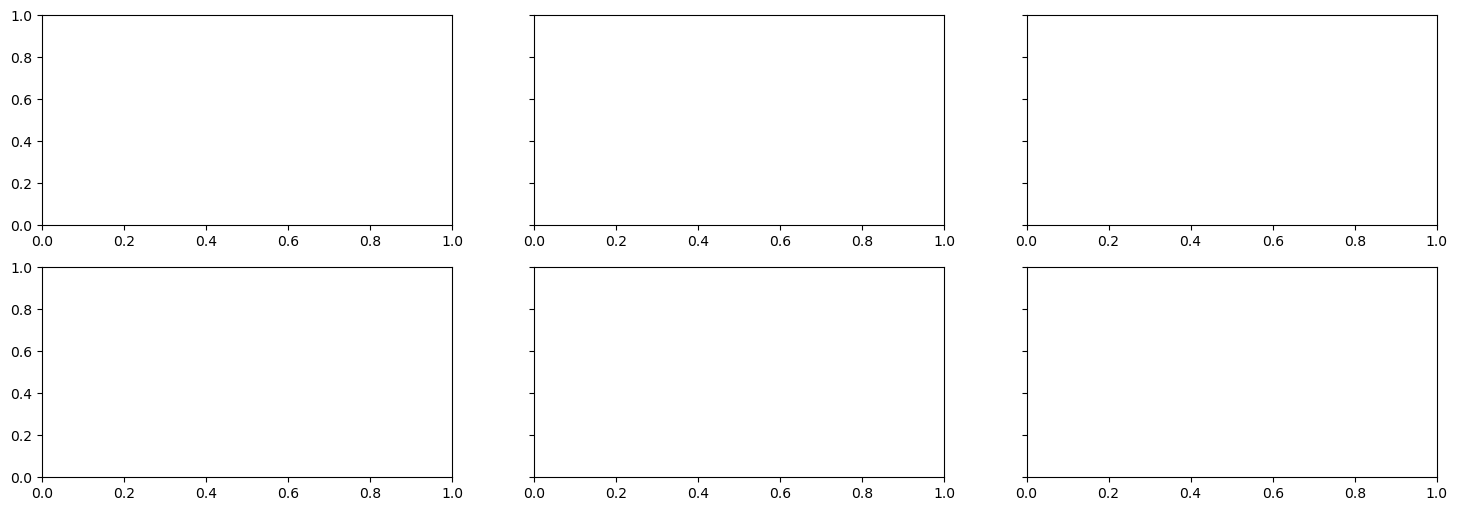

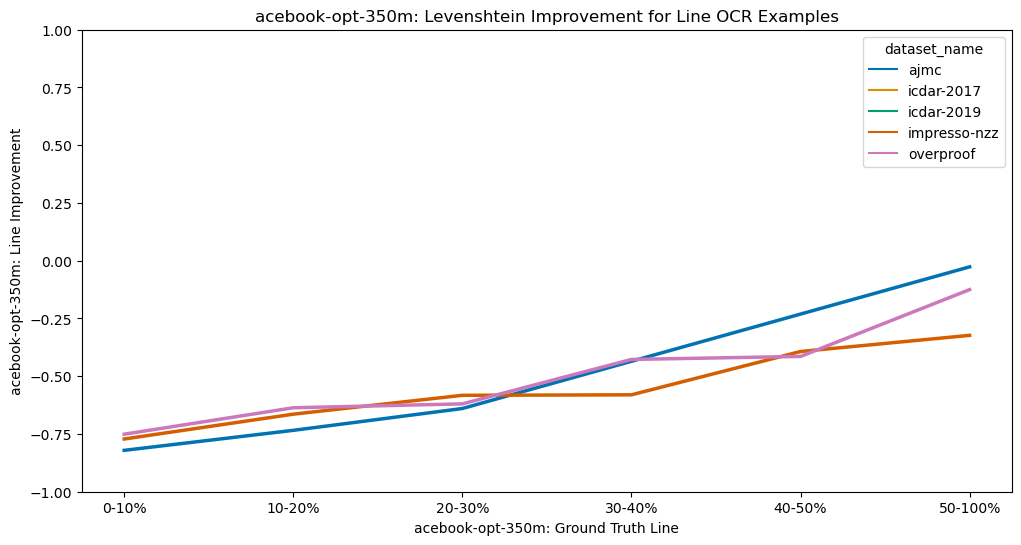

  sentence-ocr-noise-group  dataset_name  sentence-improvement
0                    0-10%          ajmc             -0.885030
1                    0-10%    icdar-2017             -0.780535
2                    0-10%    icdar-2019             -0.680936
3                    0-10%  impresso-nzz             -0.863909
4                    0-10%     overproof             -0.837393


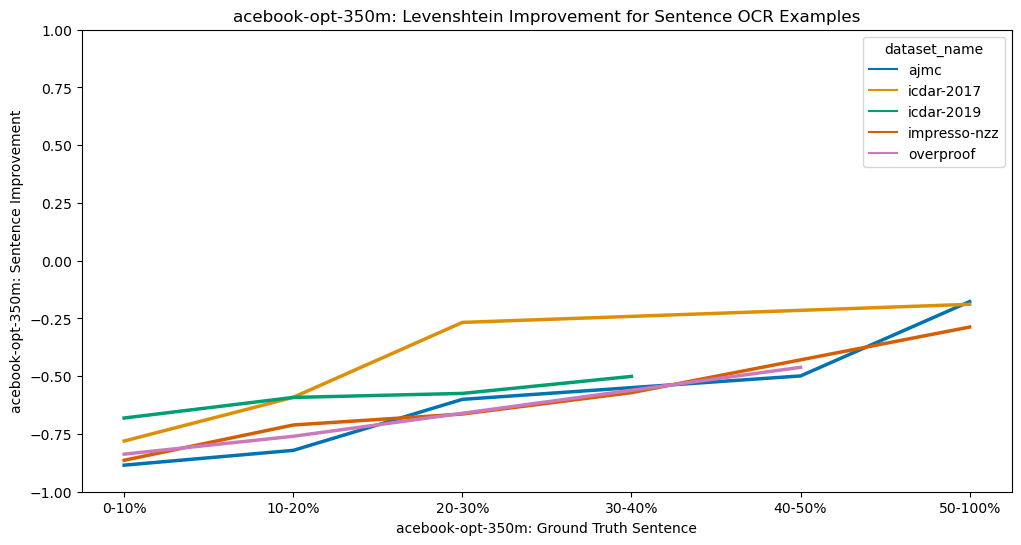

  region-ocr-noise-group  dataset_name  region-improvement
0                  0-10%          ajmc           -0.888427
1                  0-10%    icdar-2017           -0.876157
2                  0-10%    icdar-2019           -0.824499
3                  0-10%  impresso-nzz           -0.934326
4                  0-10%     overproof           -0.927872


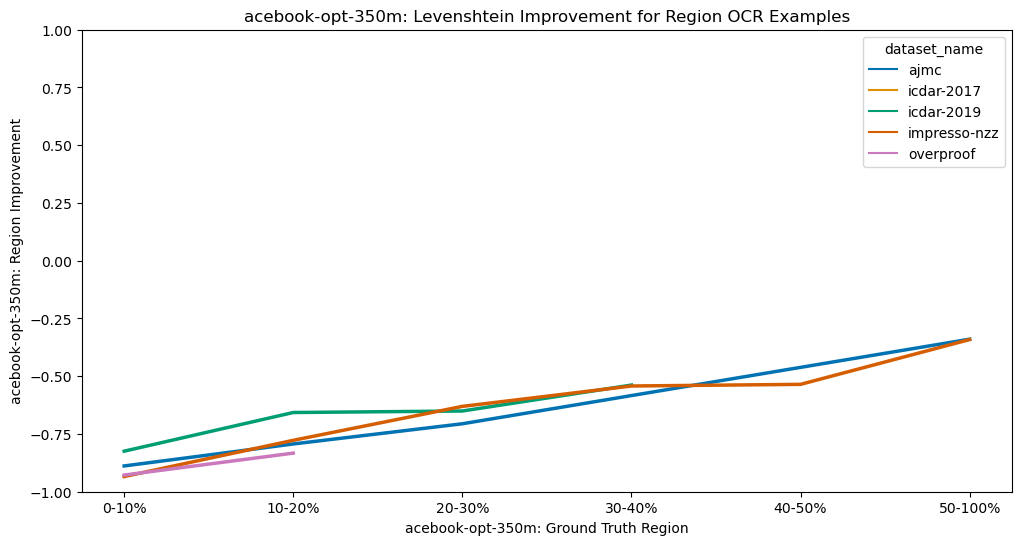

  line-ocr-noise-group  dataset_name  line-improvement
0                0-10%          ajmc         -0.829189
1                0-10%    icdar-2017          0.000000
2                0-10%    icdar-2019          0.000000
3                0-10%  impresso-nzz         -0.767271
4                0-10%     overproof         -0.746515


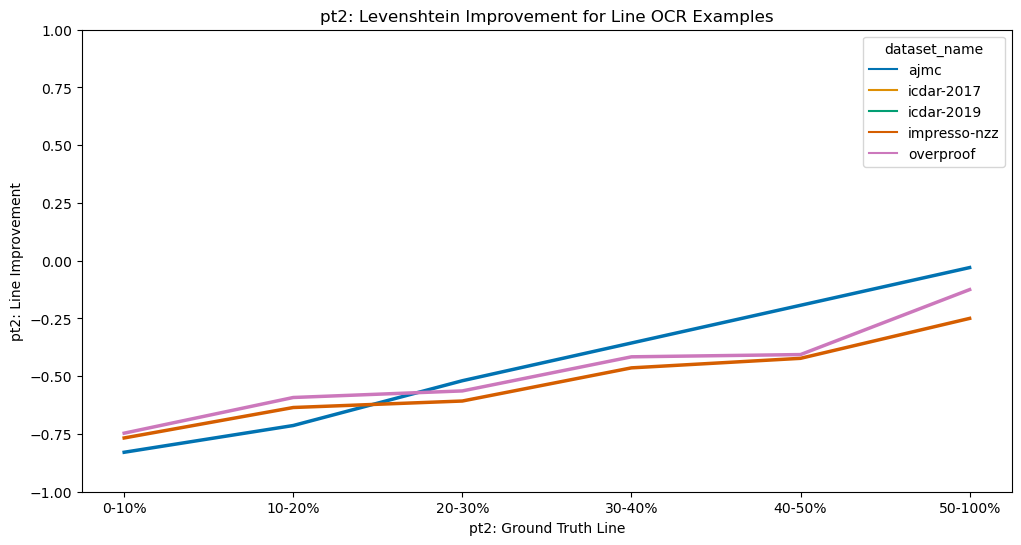

  sentence-ocr-noise-group  dataset_name  sentence-improvement
0                    0-10%          ajmc             -0.888966
1                    0-10%    icdar-2017             -0.768406
2                    0-10%    icdar-2019             -0.742899
3                    0-10%  impresso-nzz             -0.848936
4                    0-10%     overproof             -0.842902


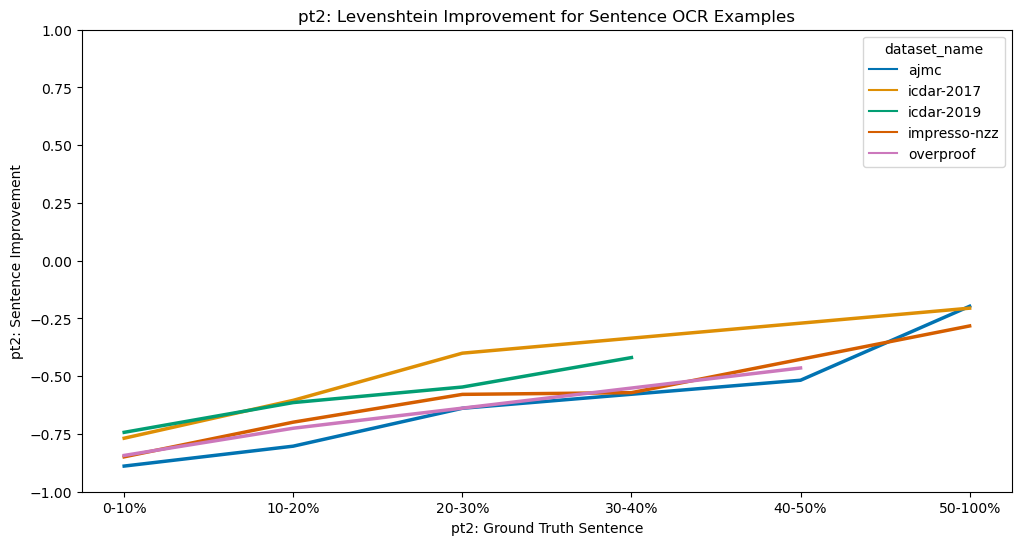

  region-ocr-noise-group  dataset_name  region-improvement
0                  0-10%          ajmc           -0.879717
1                  0-10%    icdar-2017           -0.859085
2                  0-10%    icdar-2019           -0.787672
3                  0-10%  impresso-nzz           -0.924244
4                  0-10%     overproof           -0.921685


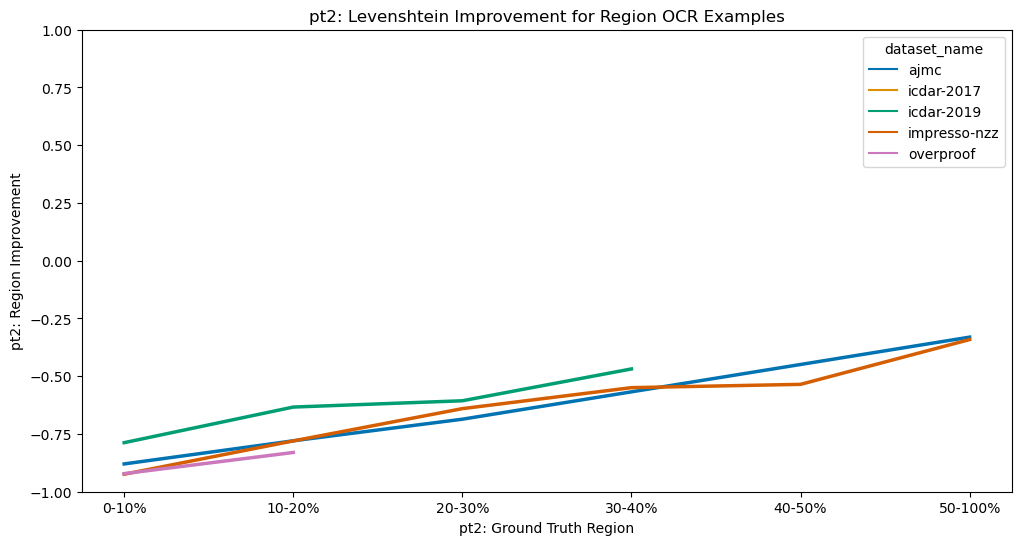

  line-ocr-noise-group  dataset_name  line-improvement
0                0-10%          ajmc         -0.813433
1                0-10%    icdar-2017          0.000000
2                0-10%    icdar-2019          0.000000
3                0-10%  impresso-nzz         -0.759331
4                0-10%     overproof         -0.748263


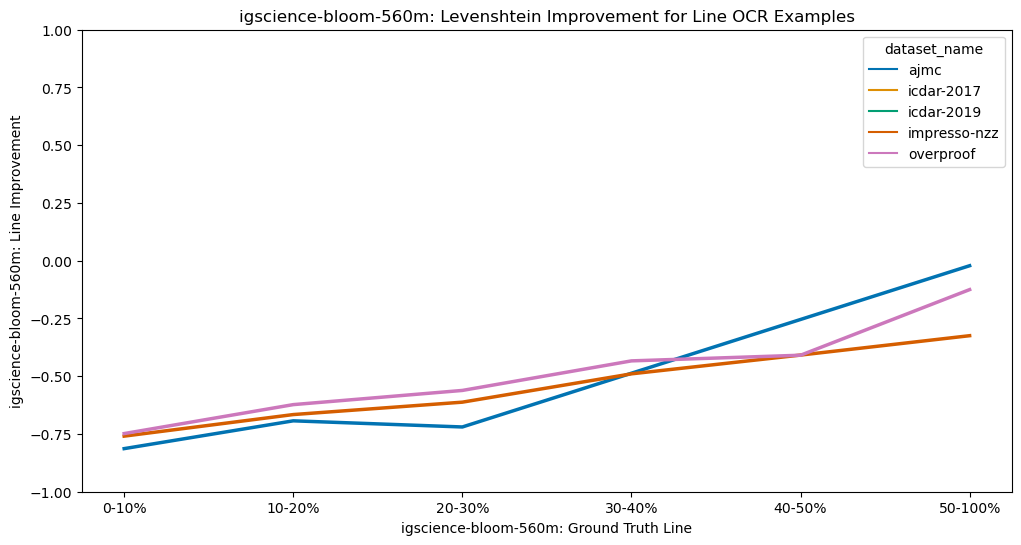

  sentence-ocr-noise-group  dataset_name  sentence-improvement
0                    0-10%          ajmc             -0.882409
1                    0-10%    icdar-2017             -0.788427
2                    0-10%    icdar-2019             -0.668193
3                    0-10%  impresso-nzz             -0.857883
4                    0-10%     overproof             -0.863023


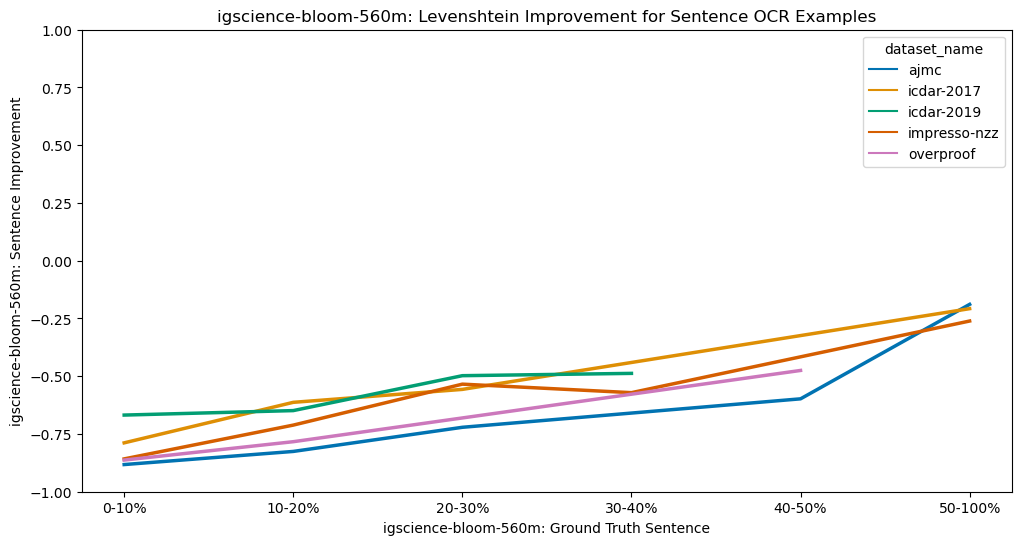

  region-ocr-noise-group  dataset_name  region-improvement
0                  0-10%          ajmc           -0.914366
1                  0-10%    icdar-2017           -0.916404
2                  0-10%    icdar-2019           -0.840308
3                  0-10%  impresso-nzz           -0.943134
4                  0-10%     overproof           -0.934367


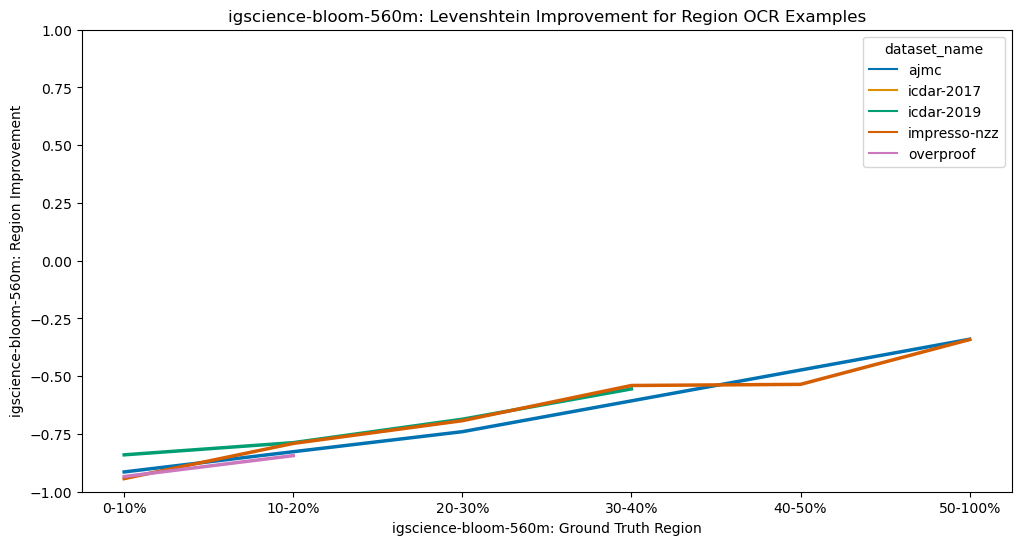

In [427]:
import seaborn as sns
import matplotlib.pyplot as plt


# Set the colorblind color palette
sns.set_palette("colorblind")
plt.figure(figsize=(12, 6))

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 6), sharey=True)

for result in results:
    
    dataset_name = result['dataset_name'].unique()[0]
    lm_name = result['LM'].unique()[0]
    
    for segment_type in ['line', 'sentence', 'region']:
        
        #grouped_results = result.groupby([f"{segment_type}-ocr-noise-group", "dataset_name"]).size().reset_index(name="count")
        
        grouped_results = result.groupby([f"{segment_type}-ocr-noise-group", "dataset_name"])[f"{segment_type}-improvement"].mean().reset_index()

        print(grouped_results.head())
        
        fig, ax = plt.subplots(figsize=(12, 6))
        # Set the y-axis limits
        ax.set_ylim(-1, 1)
        
        _ = sns.lineplot(x=f"{segment_type}-ocr-noise-group", y=f'{segment_type}-improvement', hue='dataset_name',
                 data=grouped_results, ax=ax, markers=True, linestyle='-', linewidth=2.5)

        # Set plot labels
        ax.set_xlabel(f"{lm_name}: Ground Truth {segment_type.capitalize()}")
        ax.set_ylabel(f"{lm_name}: {segment_type.capitalize()} Improvement")
        ax.set_title(f"{lm_name}: Levenshtein Improvement for {segment_type.capitalize()} OCR Examples")


        # Show the plot
        plt.show()



In [ ]:
        
        
#         # Create the line plot
#         fig, ax = plt.subplots(figsize=(12, 6))
        
#         sns.lineplot(x=f"groundtruth.{segment_type}", y=f"{segment_type}-improvement", hue='dataset_name',
#                     data=result, ax=ax)

#         # Set plot labels
#         ax.set_xlabel(f"Ground Truth {segment_type.capitalize()}")
#         ax.set_ylabel(f"{segment_type.capitalize()} Improvement")
#         ax.set_title(f"Levenshtein Improvement for {segment_type.capitalize()} OCR Examples")


#         # Show the plot
#         plt.show()

In [ ]:
for idx, result in enumerate(results):
    
    results[idx] = results[idx].fillna('No text')
    
    def replace(x):
        if len(x.strip()) == 0:
            return 'No text'
        return x
    
    for column in results[idx].columns:
        results[idx][column] = results[idx][column].apply(lambda x: replace(x))
        
    #results[idx][['groundtruth.line', 'ocr.line']] = results[idx].apply(lambda x: align_texts(x['groundtruth.line'], 
    #                                                                                        x['ocr.line']), axis=1)
    print('--'*40, idx)
    print(results[idx][['groundtruth.line', 'prediction.line']])
    results[idx][['groundtruth.line', 'prediction.line']] = results[idx].apply(lambda x: align_texts(x['groundtruth.line'], 
                                                                                                     x['prediction.line']), axis=1)
    
#     x = results[idx].apply(lambda x: levenshtein(x['groundtruth.line'].split(), 
#                                                             x['ocr.line'].split()), axis=1)
#     x = results[idx].apply(lambda x: levenshtein(x['groundtruth.sentence'].split(), 
#                                                                 x['ocr.sentence'].split()), axis=1)
#     x = results[idx].apply(lambda x: levenshtein(x['groundtruth.region'].split(), 
#                                                               x['ocr.region'].split()), axis=1)
    #print(x)
    

In [ ]:
results[0]

In [ ]:
idx = 9

In [ ]:
df.iloc[idx]['ocr.line']

In [ ]:
df.iloc[idx]['ocr.sentence']

In [ ]:
df.iloc[idx]['ocr.region']

In [ ]:
df.columns

In [ ]:
# ht_raw = " ".join(df['ocr.sentence'].to_list())
# print(f"{len(set(ht_raw.lower()))} characters in human transcription")
# print(f"The following characters have not been system-transcribed: \n{set(ht_raw.lower())-set(st_raw.lower())}")
tokens = ht_raw.split()
WORDS = set(tokens)

In [ ]:
def eddi(input_text, reference_words=WORDS, ed_threshold=25, max_unk_tokens=3):
    """ Baseline I: Edit distance -based Baseline
    An edit distance-based baseline: Given a list of valid (reference) words,
    this baseline (called eddi) detects words not in the reference list and 
    changes them to the closest one in the reference list.
    :param input_text: the source text
    :param reference_words: a list of valid words (e.g., computed from the target data) 
    :param ed_threshold: the edit distance threshold below from which a word is replaced
    :param max_unk_tokens: the max number of unknown tokens in the transcribed text 
    :return: the new text
    """
    tokens = input_text.split()
    # Unknown transcribed tokens; proceed only if few
    unknowns = [i for i, w in enumerate(tokens) if w not in reference_words]
    if len(unknowns) > max_unk_tokens:
        return " ".join(tokens)

    for ind in unknowns:
        # Replace each uknown token with the ground truth token w/min edit distance 
        word = tokens[ind]
        min_cer, new_word = 100, word
        for ref in reference_words:
            candidate_min_cer = pywer.cer([ref], [word])
            if candidate_min_cer < min_cer:
                min_cer = candidate_min_cer
                if min_cer < ed_threshold:
                    new_word = ref
    tokens[ind] = new_word
    
    return " ".join(tokens)